In [1]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import scipy as sp
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
import re
from sklearn.preprocessing import LabelEncoder
import nltk
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from nltk import word_tokenize

nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
import keras
from sklearn.model_selection import KFold
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dineshpasupuleti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("./enron1.csv")
df.describe()

,Unnamed: 0,WordCount,SubjectWordCount,ParagraphCount,SentenceCount,AverageWordLength,SubjectAverageWordLength,PolarityScore,SubjectPolarityScore,NumRecipients
count,44043.000000,44043.000000,44043.000000,44043.000000,44043.000000,44043.000000,44043.000000,44043.000000,44043.000000,44043.000000
mean,26082.285721,51.752855,4.000727,2.615603,3.581364,3.805212,5.664501,0.116260,0.016108,2.123243
std,14560.179228,111.913276,3.175218,1.803151,4.583639,1.100842,2.151700,0.227497,0.125008,7.529557
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,1.000000
25%,13990.500000,12.000000,2.000000,2.000000,1.000000,3.382353,4.226496,0.000000,0.000000,1.000000
50%,26359.000000,26.000000,3.000000,2.000000,2.000000,3.734597,5.375000,0.032468,0.000000,1.000000
75%,38358.500000,55.000000,5.000000,3.000000,4.000000,4.108514,6.666667,0.200000,0.000000,2.000000
max,51074.000000,8227.000000,50.000000,50.000000,155.000000,60.000000,46.000000,1.000000,1.000000,484.000000


In [4]:
df = df.drop(["Unnamed: 0"], axis=1)
df

,filepath,email,body,processedBody,sender,subject,date,folder,processed_subject,recipient,...,SubjectAverageWordLength,PolarityScore,SubjectPolarityScore,NumRecipients,Most POS,Greetings,Most Common Word,Most POS Subject,Greetings in Subject,Most Common Word in Subject
0,symes-k/sent/1290.,Message-ID: <7046567.1075841908922.JavaMail.ev...,Chris -\nWould you mind e-mailing Evelyn your ...,Chris -\nWould you mind e-mailing Evelyn your ...,symes-k,Automated Power Exchange,"Mon, 30 Apr 2001 07:55:00 -0700 (PDT)",sent,Automated Power Exchange,Chris H Foster,...,7.333333,0.200000,0.0,1,PRP,Chris,you,NNP,Automated,automated
1,symes-k/sent/36.,Message-ID: <22564088.1075841879733.JavaMail.e...,"Looks great, Anna.","Looks great, Anna.",symes-k,Re: Holiday Party Mailing List,"Fri, 27 Oct 2000 03:32:00 -0700 (PDT)",sent,Holiday Party Mailing List,Anna Mehrer,...,5.750000,0.800000,0.0,1,NNP,Looks,looks,NNP,Holiday,holiday
2,symes-k/sent/667.,Message-ID: <21601140.1075841894251.JavaMail.e...,"I came, I saw, I viewed.....and now I will eat...","I came, I saw, I viewed.....and now I will eat...",symes-k,"Re: One tomato, two tomato, three tomato, four!","Thu, 22 Feb 2001 10:05:00 -0800 (PST)",sent,"One tomato, two tomato, three tomato, four!",Grace Rodriguez,...,3.363636,0.250000,0.0,1,PRP,I,i,CD,One,tomato
3,symes-k/sent/1023.,Message-ID: <5071824.1075841902668.JavaMail.ev...,Following are the deals I changed to the corre...,Following are the deals I changed to the corre...,symes-k,Re: More deals found by Will Smith,"Thu, 29 Mar 2001 05:45:00 -0800 (PST)",sent,More deals found by Will Smith,Cara Semperger,...,4.166667,0.150000,0.5,1,NN,Following,-,NNP,More,more
4,symes-k/sent/759.,Message-ID: <11201614.1075841896397.JavaMail.e...,Thanks!,Thanks!,symes-k,Re: 535799,"Mon, 5 Mar 2001 00:53:00 -0800 (PST)",sent,535799,Sean Crandall,...,6.000000,0.250000,0.0,1,NNS,Thanks,thanks,CD,535799,535799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44038,nemec-g/sent/752.,Message-ID: <12630318.1075842683424.JavaMail.e...,Attached for your review is a draft of the Los...,Attached for your review is a draft of the Los...,nemec-g,Lost Creek IT Agreement,"Mon, 21 Aug 2000 11:54:00 -0700 (PDT)",sent,Lost Creek IT Agreement,"Mark Whitt@ECT, James Hoff",...,5.000000,0.187500,0.0,2,NNP,Attached,.,NNP,Lost,lost
44039,nemec-g/sent/893.,Message-ID: <24469094.1075842686699.JavaMail.e...,"Chris, Attached is a redlined of the revised ...","Chris, Attached is a redlined of the revised ...",nemec-g,ENA-Lost Creek IT Agreement,"Fri, 27 Oct 2000 07:06:00 -0700 (PDT)",sent,ENA-Lost Creek IT Agreement,choekenga@br-inc.com,...,6.000000,0.200000,0.0,1,NNP,Chris,.,NNP,ENA,ena-lost
44040,nemec-g/sent/351.,Message-ID: <9777889.1075842673263.JavaMail.ev...,Let's talk.\n\n\n---------------------- Forwar...,Let's talk.\n\n,nemec-g,Agreement to Upgrade and Operate Natural Gas P...,"Mon, 17 Jan 2000 07:59:00 -0800 (PST)",sent,Agreement to Upgrade and Operate Natural Gas P...,Eric Gillaspie,...,6.222222,0.000000,0.1,1,VB,Let,let,NNP,Agreement,agreement
44041,nemec-g/sent/2360.,Message-ID: <3389850.1075842908651.JavaMail.ev...,I plan on attending the dinner.,I plan on attending the dinner.,nemec-g,Re: Enron Law Conference - Dinner Attendance,"Tue, 10 Apr 2001 06:38:00 -0700 (PDT)",sent,Enron Law Conference - Dinner Attendance,Sara Davidson,...,5.833333,0.000000,0.0,1,PRP,I,i,NNP,Enron,enron


In [5]:
# create preprocess_text function
def preprocess_text(text):
   # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [6]:
nltk.download('wordnet')
df['finalBody'] = df['processedBody'].apply(preprocess_text)
df['finalSubject'] = df['processed_subject'].apply(preprocess_text)
df

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dineshpasupuleti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,filepath,email,body,processedBody,sender,subject,date,folder,processed_subject,recipient,...,SubjectPolarityScore,NumRecipients,Most POS,Greetings,Most Common Word,Most POS Subject,Greetings in Subject,Most Common Word in Subject,finalBody,finalSubject
0,symes-k/sent/1290.,Message-ID: <7046567.1075841908922.JavaMail.ev...,Chris -\nWould you mind e-mailing Evelyn your ...,Chris -\nWould you mind e-mailing Evelyn your ...,symes-k,Automated Power Exchange,"Mon, 30 Apr 2001 07:55:00 -0700 (PDT)",sent,Automated Power Exchange,Chris H Foster,...,0.0,1,PRP,Chris,you,NNP,Automated,automated,chris - would mind e-mailing evelyn contact in...,automated power exchange
1,symes-k/sent/36.,Message-ID: <22564088.1075841879733.JavaMail.e...,"Looks great, Anna.","Looks great, Anna.",symes-k,Re: Holiday Party Mailing List,"Fri, 27 Oct 2000 03:32:00 -0700 (PDT)",sent,Holiday Party Mailing List,Anna Mehrer,...,0.0,1,NNP,Looks,looks,NNP,Holiday,holiday,"look great , anna .",holiday party mailing list
2,symes-k/sent/667.,Message-ID: <21601140.1075841894251.JavaMail.e...,"I came, I saw, I viewed.....and now I will eat...","I came, I saw, I viewed.....and now I will eat...",symes-k,"Re: One tomato, two tomato, three tomato, four!","Thu, 22 Feb 2001 10:05:00 -0800 (PST)",sent,"One tomato, two tomato, three tomato, four!",Grace Rodriguez,...,0.0,1,PRP,I,i,CD,One,tomato,"came , saw , viewed ..... eat . thanks update ...","one tomato , two tomato , three tomato , four !"
3,symes-k/sent/1023.,Message-ID: <5071824.1075841902668.JavaMail.ev...,Following are the deals I changed to the corre...,Following are the deals I changed to the corre...,symes-k,Re: More deals found by Will Smith,"Thu, 29 Mar 2001 05:45:00 -0800 (PST)",sent,More deals found by Will Smith,Cara Semperger,...,0.5,1,NN,Following,-,NNP,More,more,"following deal changed correct time zone , per...",deal found smith
4,symes-k/sent/759.,Message-ID: <11201614.1075841896397.JavaMail.e...,Thanks!,Thanks!,symes-k,Re: 535799,"Mon, 5 Mar 2001 00:53:00 -0800 (PST)",sent,535799,Sean Crandall,...,0.0,1,NNS,Thanks,thanks,CD,535799,535799,thanks !,535799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44038,nemec-g/sent/752.,Message-ID: <12630318.1075842683424.JavaMail.e...,Attached for your review is a draft of the Los...,Attached for your review is a draft of the Los...,nemec-g,Lost Creek IT Agreement,"Mon, 21 Aug 2000 11:54:00 -0700 (PDT)",sent,Lost Creek IT Agreement,"Mark Whitt@ECT, James Hoff",...,0.0,2,NNP,Attached,.,NNP,Lost,lost,attached review draft lost creek - ena agreeme...,lost creek agreement
44039,nemec-g/sent/893.,Message-ID: <24469094.1075842686699.JavaMail.e...,"Chris, Attached is a redlined of the revised ...","Chris, Attached is a redlined of the revised ...",nemec-g,ENA-Lost Creek IT Agreement,"Fri, 27 Oct 2000 07:06:00 -0700 (PDT)",sent,ENA-Lost Creek IT Agreement,choekenga@br-inc.com,...,0.0,1,NNP,Chris,.,NNP,ENA,ena-lost,"chris , attached redlined revised ena - lost c...",ena-lost creek agreement
44040,nemec-g/sent/351.,Message-ID: <9777889.1075842673263.JavaMail.ev...,Let's talk.\n\n\n---------------------- Forwar...,Let's talk.\n\n,nemec-g,Agreement to Upgrade and Operate Natural Gas P...,"Mon, 17 Jan 2000 07:59:00 -0800 (PST)",sent,Agreement to Upgrade and Operate Natural Gas P...,Eric Gillaspie,...,0.1,1,VB,Let,let,NNP,Agreement,agreement,let 's talk .,agreement upgrade operate natural gas pipeline...
44041,nemec-g/sent/2360.,Message-ID: <3389850.1075842908651.JavaMail.ev...,I plan on attending the dinner.,I plan on attending the dinner.,nemec-g,Re: Enron Law Conference - Dinner Attendance,"Tue, 10 Apr 2001 06:38:00 -0700 (PDT)",sent,Enron Law Conference - Dinner Attendance,Sara Davidson,...,0.0,1,PRP,I,i,NNP,Enron,enron,plan attending dinner .,enron law conference - dinner attendance


In [7]:
def text_process(text):
    #Remove Punctuation Marks
    text = text.lower()
    nopunct = ""
    clean_final = []
    for char in text:
        if re.match(r"\w", char) or re.match(r" ", char):
            nopunct += char
        elif re.match(r" ", char):
            nopunct += char
        else:
            nopunct += " "
    for word in nopunct.split():
        if not word in stop_words:
            clean_final.append(word)
    return " ".join(clean_final)

In [8]:
df['finalBody'] = df['finalBody'].apply(text_process)
df['finalSubject'] = df['finalSubject'].apply(text_process)
df

,filepath,email,body,processedBody,sender,subject,date,folder,processed_subject,recipient,...,SubjectPolarityScore,NumRecipients,Most POS,Greetings,Most Common Word,Most POS Subject,Greetings in Subject,Most Common Word in Subject,finalBody,finalSubject
0,symes-k/sent/1290.,Message-ID: <7046567.1075841908922.JavaMail.ev...,Chris -\nWould you mind e-mailing Evelyn your ...,Chris -\nWould you mind e-mailing Evelyn your ...,symes-k,Automated Power Exchange,"Mon, 30 Apr 2001 07:55:00 -0700 (PDT)",sent,Automated Power Exchange,Chris H Foster,...,0.0,1,PRP,Chris,you,NNP,Automated,automated,chris would mind e mailing evelyn contact info...,automated power exchange
1,symes-k/sent/36.,Message-ID: <22564088.1075841879733.JavaMail.e...,"Looks great, Anna.","Looks great, Anna.",symes-k,Re: Holiday Party Mailing List,"Fri, 27 Oct 2000 03:32:00 -0700 (PDT)",sent,Holiday Party Mailing List,Anna Mehrer,...,0.0,1,NNP,Looks,looks,NNP,Holiday,holiday,look great anna,holiday party mailing list
2,symes-k/sent/667.,Message-ID: <21601140.1075841894251.JavaMail.e...,"I came, I saw, I viewed.....and now I will eat...","I came, I saw, I viewed.....and now I will eat...",symes-k,"Re: One tomato, two tomato, three tomato, four!","Thu, 22 Feb 2001 10:05:00 -0800 (PST)",sent,"One tomato, two tomato, three tomato, four!",Grace Rodriguez,...,0.0,1,PRP,I,i,CD,One,tomato,came saw viewed eat thanks update grace kate,one tomato two tomato three tomato four
3,symes-k/sent/1023.,Message-ID: <5071824.1075841902668.JavaMail.ev...,Following are the deals I changed to the corre...,Following are the deals I changed to the corre...,symes-k,Re: More deals found by Will Smith,"Thu, 29 Mar 2001 05:45:00 -0800 (PST)",sent,More deals found by Will Smith,Cara Semperger,...,0.5,1,NN,Following,-,NNP,More,more,following deal changed correct time zone per s...,deal found smith
4,symes-k/sent/759.,Message-ID: <11201614.1075841896397.JavaMail.e...,Thanks!,Thanks!,symes-k,Re: 535799,"Mon, 5 Mar 2001 00:53:00 -0800 (PST)",sent,535799,Sean Crandall,...,0.0,1,NNS,Thanks,thanks,CD,535799,535799,thanks,535799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44038,nemec-g/sent/752.,Message-ID: <12630318.1075842683424.JavaMail.e...,Attached for your review is a draft of the Los...,Attached for your review is a draft of the Los...,nemec-g,Lost Creek IT Agreement,"Mon, 21 Aug 2000 11:54:00 -0700 (PDT)",sent,Lost Creek IT Agreement,"Mark Whitt@ECT, James Hoff",...,0.0,2,NNP,Attached,.,NNP,Lost,lost,attached review draft lost creek ena agreement...,lost creek agreement
44039,nemec-g/sent/893.,Message-ID: <24469094.1075842686699.JavaMail.e...,"Chris, Attached is a redlined of the revised ...","Chris, Attached is a redlined of the revised ...",nemec-g,ENA-Lost Creek IT Agreement,"Fri, 27 Oct 2000 07:06:00 -0700 (PDT)",sent,ENA-Lost Creek IT Agreement,choekenga@br-inc.com,...,0.0,1,NNP,Chris,.,NNP,ENA,ena-lost,chris attached redlined revised ena lost creek...,ena lost creek agreement
44040,nemec-g/sent/351.,Message-ID: <9777889.1075842673263.JavaMail.ev...,Let's talk.\n\n\n---------------------- Forwar...,Let's talk.\n\n,nemec-g,Agreement to Upgrade and Operate Natural Gas P...,"Mon, 17 Jan 2000 07:59:00 -0800 (PST)",sent,Agreement to Upgrade and Operate Natural Gas P...,Eric Gillaspie,...,0.1,1,VB,Let,let,NNP,Agreement,agreement,let talk,agreement upgrade operate natural gas pipeline...
44041,nemec-g/sent/2360.,Message-ID: <3389850.1075842908651.JavaMail.ev...,I plan on attending the dinner.,I plan on attending the dinner.,nemec-g,Re: Enron Law Conference - Dinner Attendance,"Tue, 10 Apr 2001 06:38:00 -0700 (PDT)",sent,Enron Law Conference - Dinner Attendance,Sara Davidson,...,0.0,1,PRP,I,i,NNP,Enron,enron,plan attending dinner,enron law conference dinner attendance


In [9]:
# Encoding class names with LabelEncoder()

y = LabelEncoder().fit_transform(df["sender"])

#Dropped all unrequired columns/attributes

X = df.drop(["sender", "filepath", "email", "body", "processedBody", "folder","subject", "processed_subject"], axis=1)

In [10]:
X

,date,recipient,WordCount,SubjectWordCount,ParagraphCount,SentenceCount,AverageWordLength,SubjectAverageWordLength,PolarityScore,SubjectPolarityScore,NumRecipients,Most POS,Greetings,Most Common Word,Most POS Subject,Greetings in Subject,Most Common Word in Subject,finalBody,finalSubject
0,"Mon, 30 Apr 2001 07:55:00 -0700 (PDT)",Chris H Foster,53,3,2,4,3.735849,7.333333,0.200000,0.0,1,PRP,Chris,you,NNP,Automated,automated,chris would mind e mailing evelyn contact info...,automated power exchange
1,"Fri, 27 Oct 2000 03:32:00 -0700 (PDT)",Anna Mehrer,5,4,1,1,3.200000,5.750000,0.800000,0.0,1,NNP,Looks,looks,NNP,Holiday,holiday,look great anna,holiday party mailing list
2,"Thu, 22 Feb 2001 10:05:00 -0800 (PST)",Grace Rodriguez,23,11,3,3,2.913043,3.363636,0.250000,0.0,1,PRP,I,i,CD,One,tomato,came saw viewed eat thanks update grace kate,one tomato two tomato three tomato four
3,"Thu, 29 Mar 2001 05:45:00 -0800 (PST)",Cara Semperger,123,6,5,3,3.764228,4.166667,0.150000,0.5,1,NN,Following,-,NNP,More,more,following deal changed correct time zone per s...,deal found smith
4,"Mon, 5 Mar 2001 00:53:00 -0800 (PST)",Sean Crandall,2,1,1,1,3.500000,6.000000,0.250000,0.0,1,NNS,Thanks,thanks,CD,535799,535799,thanks,535799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44038,"Mon, 21 Aug 2000 11:54:00 -0700 (PDT)","Mark Whitt@ECT, James Hoff",52,4,1,3,4.192308,5.000000,0.187500,0.0,2,NNP,Attached,.,NNP,Lost,lost,attached review draft lost creek ena agreement...,lost creek agreement
44039,"Fri, 27 Oct 2000 07:06:00 -0700 (PDT)",choekenga@br-inc.com,50,4,1,6,3.960000,6.000000,0.200000,0.0,1,NNP,Chris,.,NNP,ENA,ena-lost,chris attached redlined revised ena lost creek...,ena lost creek agreement
44040,"Mon, 17 Jan 2000 07:59:00 -0800 (PST)",Eric Gillaspie,4,9,2,1,2.500000,6.222222,0.000000,0.1,1,VB,Let,let,NNP,Agreement,agreement,let talk,agreement upgrade operate natural gas pipeline...
44041,"Tue, 10 Apr 2001 06:38:00 -0700 (PDT)",Sara Davidson,7,6,1,1,3.714286,5.833333,0.000000,0.0,1,PRP,I,i,NNP,Enron,enron,plan attending dinner,enron law conference dinner attendance


In [11]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [13]:
# AdaBoost Classifier Model using 5-fold Cross Validation and CountVectorizer

kfold = KFold(n_splits=5, random_state=1, shuffle=True)
adaBoost_model = AdaBoostClassifier(n_estimators=100, random_state=42)  # AdaBoost Classifier
train_accuracies_ab = []
test_accuracies_ab = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # ColumnTransformers
    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("countvectorizer", CountVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown="ignore"), ["Most POS", "Greetings", "Most Common Word"])])

    # Transformation for ct_three
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    # Transformation for ct_two
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)

    # Transformation for ct_one
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    # Merge transformed features
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))

    # Train the AdaBoost Classifier
    fit_model_ab = adaBoost_model.fit(X_train_transform, y_train)
    train_acc = adaBoost_model.score(X_train_transform, y_train)
    test_acc = adaBoost_model.score(X_test_transform, y_test)

    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)

    train_accuracies_ab.append(train_acc)
    test_accuracies_ab.append(test_acc)

    i += 1

# Evaluation
Y_pred_ab = fit_model_ab.predict(X_test_transform)
f1_ab_1 = f1_score(y_test, Y_pred_ab, average="micro")
avg_train_acc_ab_1 = sum(train_accuracies_ab) / len(train_accuracies_ab)
avg_test_acc_ab_1 = sum(test_accuracies_ab) / len(test_accuracies_ab)

print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_ab_1)
print("Average Testing Accuracy:")
print(avg_test_acc_ab_1)
print("F1 Score:")
print(f1_ab_1)
print("===========================")

Round 1
Training Accuracy
0.5886927399670773
Testing Accuracy
0.5938244976728346
Round 2
Training Accuracy
0.5779644661406595
Testing Accuracy
0.5729367692133046
Round 3
Training Accuracy
0.5775671226656071
Testing Accuracy
0.5664661142013849
Round 4
Training Accuracy
0.5671065701717043
Testing Accuracy
0.5624432334241598
Round 5
Training Accuracy
0.5848446147296722
Testing Accuracy
0.5846957311534968
Average Training Accuracy:
0.5792351027349442
Average Testing Accuracy:
0.5760732691330361
F1 Score:
0.5846957311534968


In [14]:
# AdaBoost Classifier Model using 10-fold Cross Validation and CountVectorizer

kfold = KFold(n_splits=10, random_state=1, shuffle=True)
adaBoost_model = AdaBoostClassifier(n_estimators=100, random_state=42)  # AdaBoost Classifier
train_accuracies_ab = []
test_accuracies_ab = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # ColumnTransformers
    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("countvectorizer", CountVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown="ignore"), ["Most POS", "Greetings", "Most Common Word"])])

    # Transformation for ct_three
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    # Transformation for ct_two
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)

    # Transformation for ct_one
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    # Merge transformed features
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))

    # Train the AdaBoost Classifier
    fit_model_ab = adaBoost_model.fit(X_train_transform, y_train)
    train_acc = adaBoost_model.score(X_train_transform, y_train)
    test_acc = adaBoost_model.score(X_test_transform, y_test)

    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)

    train_accuracies_ab.append(train_acc)
    test_accuracies_ab.append(test_acc)

    i += 1

# Evaluation
Y_pred_ab = fit_model_ab.predict(X_test_transform)
f1_ab_2 = f1_score(y_test, Y_pred_ab, average="micro")
avg_train_acc_ab_2 = sum(train_accuracies_ab) / len(train_accuracies_ab)
avg_test_acc_ab_2 = sum(test_accuracies_ab) / len(test_accuracies_ab)

print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_ab_2)
print("Average Testing Accuracy:")
print(avg_test_acc_ab_2)
print("F1 Score:")
print(f1_ab_2)
print("===========================")

Round 1
Training Accuracy
0.5885261617639639
Testing Accuracy
0.590011350737798
Round 2
Training Accuracy
0.5796962510722035
Testing Accuracy
0.5925085130533485
Round 3
Training Accuracy
0.5877440839598366
Testing Accuracy
0.5711691259931896
Round 4
Training Accuracy
0.5839198768889226
Testing Accuracy
0.5935513169845595
Round 5
Training Accuracy
0.5800852695577587
Testing Accuracy
0.567211625794732
Round 6
Training Accuracy
0.5833396402532859
Testing Accuracy
0.5815168029064487
Round 7
Training Accuracy
0.5792023007643987
Testing Accuracy
0.5728882833787466
Round 8
Training Accuracy
0.5706501173087111
Testing Accuracy
0.565622161671208
Round 9
Training Accuracy
0.5756956532707687
Testing Accuracy
0.579700272479564
Round 10
Training Accuracy
0.577385907818058
Testing Accuracy
0.5758401453224341
Average Training Accuracy:
0.5806245262657908
Average Testing Accuracy:
0.579001959832203
F1 Score:
0.5758401453224341


In [15]:
# AdaBoost Classifier Model using 5-fold Cross Validation and TfidfVectorizer

kfold = KFold(n_splits=5, random_state=1, shuffle=True)
adaBoost_model = AdaBoostClassifier(n_estimators=100, random_state=42)  # AdaBoost Classifier
train_accuracies_ab = []
test_accuracies_ab = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # ColumnTransformers
    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown="ignore"), ["Most POS", "Greetings", "Most Common Word"])])

    # Transformation for ct_three
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    # Transformation for ct_two
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)

    # Transformation for ct_one
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    # Merge transformed features
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))

    # Train the AdaBoost Classifier
    fit_model_ab = adaBoost_model.fit(X_train_transform, y_train)
    train_acc = adaBoost_model.score(X_train_transform, y_train)
    test_acc = adaBoost_model.score(X_test_transform, y_test)

    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)

    train_accuracies_ab.append(train_acc)
    test_accuracies_ab.append(test_acc)

    i += 1

# Evaluation
Y_pred_ab = fit_model_ab.predict(X_test_transform)
f1_ab_3 = f1_score(y_test, Y_pred_ab, average="micro")
avg_train_acc_ab_3 = sum(train_accuracies_ab) / len(train_accuracies_ab)
avg_test_acc_ab_3 = sum(test_accuracies_ab) / len(test_accuracies_ab)

print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_ab_3)
print("Average Testing Accuracy:")
print(avg_test_acc_ab_3)
print("F1 Score:")
print(f1_ab_3)
print("===========================")

Round 1
Training Accuracy
0.568343077709031
Testing Accuracy
0.5714610057895334
Round 2
Training Accuracy
0.5773968326048703
Testing Accuracy
0.5691906005221932
Round 3
Training Accuracy
0.5683146960322416
Testing Accuracy
0.5606765807696674
Round 4
Training Accuracy
0.5697743720732227
Testing Accuracy
0.5634650317892824
Round 5
Training Accuracy
0.5635021995175252
Testing Accuracy
0.5638056312443234
Average Training Accuracy:
0.5694662355873782
Average Testing Accuracy:
0.5657197700229999
F1 Score:
0.5638056312443234


In [16]:
# AdaBoost Classifier Model using 10-fold Cross Validation and TfidfVectorizer

kfold = KFold(n_splits=10, random_state=1, shuffle=True)
adaBoost_model = AdaBoostClassifier(n_estimators=100, random_state=42)  # AdaBoost Classifier
train_accuracies_ab = []
test_accuracies_ab = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # ColumnTransformers
    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown="ignore"), ["Most POS", "Greetings", "Most Common Word"])])

    # Transformation for ct_three
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    # Transformation for ct_two
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)

    # Transformation for ct_one
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    # Merge transformed features
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))

    # Train the AdaBoost Classifier
    fit_model_ab = adaBoost_model.fit(X_train_transform, y_train)
    train_acc = adaBoost_model.score(X_train_transform, y_train)
    test_acc = adaBoost_model.score(X_test_transform, y_test)

    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)

    train_accuracies_ab.append(train_acc)
    test_accuracies_ab.append(test_acc)

    i += 1

# Evaluation
Y_pred_ab = fit_model_ab.predict(X_test_transform)
f1_ab_4 = f1_score(y_test, Y_pred_ab, average="micro")
avg_train_acc_ab_4 = sum(train_accuracies_ab) / len(train_accuracies_ab)
avg_test_acc_ab_4 = sum(test_accuracies_ab) / len(test_accuracies_ab)

print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_ab_4)
print("Average Testing Accuracy:")
print(avg_test_acc_ab_4)
print("F1 Score:")
print(f1_ab_4)
print("===========================")

Round 1
Training Accuracy
0.5826227357586155
Testing Accuracy
0.5832009080590238
Round 2
Training Accuracy
0.5689742166607801
Testing Accuracy
0.5763904653802497
Round 3
Training Accuracy
0.5743983046571471
Testing Accuracy
0.560272417707151
Round 4
Training Accuracy
0.5767552158228008
Testing Accuracy
0.5853769300635786
Round 5
Training Accuracy
0.566689371578496
Testing Accuracy
0.5579019073569482
Round 6
Training Accuracy
0.5793032114836398
Testing Accuracy
0.5708446866485014
Round 7
Training Accuracy
0.5768308988622316
Testing Accuracy
0.5790190735694822
Round 8
Training Accuracy
0.5676984787709074
Testing Accuracy
0.5572207084468664
Round 9
Training Accuracy
0.5674462019728046
Testing Accuracy
0.565622161671208
Round 10
Training Accuracy
0.587552662781604
Testing Accuracy
0.5892370572207084
Average Training Accuracy:
0.5748271298349028
Average Testing Accuracy:
0.5725086316123719
F1 Score:
0.5892370572207084


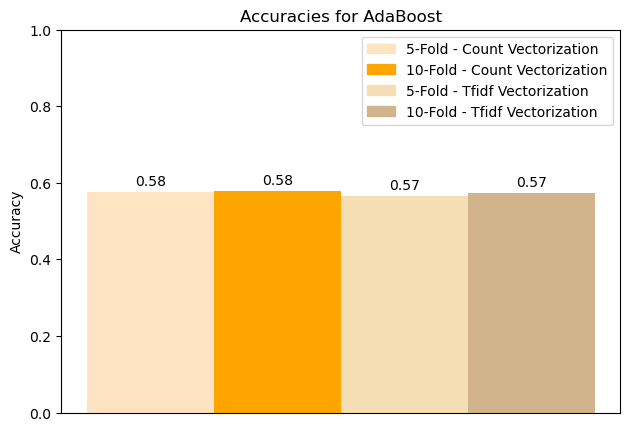

In [42]:
#Accuracies plot for AdaBoost Model
colors = ['bisque', 'orange', 'wheat', 'tan']

a, b, c, d = avg_test_acc_ab_1, avg_test_acc_ab_2, avg_test_acc_ab_3, avg_test_acc_ab_4
index = np.arange(4)
legend_labels = ['5-Fold - Count Vectorization', '10-Fold - Count Vectorization', '5-Fold - Tfidf Vectorization', '10-Fold - Tfidf Vectorization']
bars = plt.bar(index, [a, b, c, d], 1, color=colors)

plt.tight_layout()
plt.ylabel('Accuracy')
plt.xticks([])
plt.ylim(0, 1)  # Change y-axis range here
plt.title('Accuracies for AdaBoost')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for bar, value in zip(bars, [a, b, c, d]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(legend_patches, legend_labels)
plt.show()

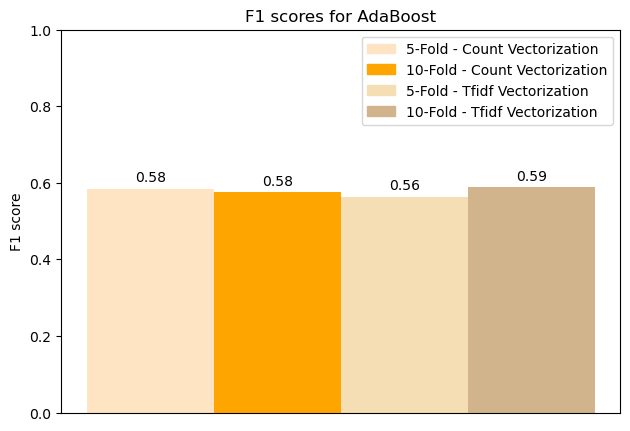

In [44]:
#F1 scores plot for AdaBoost Model
colors = ['bisque', 'orange', 'wheat', 'tan']

a, b, c, d = f1_ab_1, f1_ab_2, f1_ab_3, f1_ab_4
index = np.arange(4)
legend_labels = ['5-Fold - Count Vectorization', '10-Fold - Count Vectorization', '5-Fold - Tfidf Vectorization', '10-Fold - Tfidf Vectorization']
bars = plt.bar(index, [a, b, c, d], 1, color=colors)

plt.tight_layout()
plt.ylabel('F1 score')
plt.xticks([])
plt.ylim(0, 1)  # Change y-axis range here
plt.title('F1 scores for AdaBoost')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for bar, value in zip(bars, [a, b, c, d]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(legend_patches, legend_labels)
plt.show()

In [45]:
# Naive Bayes Classifier using 5-fold Cross Validation and CountVectorizer
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
classifier = MultinomialNB()
train_accuracies_nb = []
test_accuracies_nb = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("countvectorizer", CountVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Most POS", "Greetings", "Most Common Word", "Most POS Subject", "Greetings in Subject", "Most Common Word in Subject"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)
    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_nb = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_nb = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    classifier.fit(X_train_nb, y_train)
    test_acc = classifier.score(X_test_nb, y_test)
    train_acc = classifier.score(X_train_nb, y_train)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_nb.append(train_acc)
    test_accuracies_nb.append(test_acc)
    
    i = i + 1

Y_pred_nb = classifier.predict(X_test_nb)
f1_nb_1 = f1_score(y_test, Y_pred_nb, average = "micro")
avg_train_acc_nb_1 = sum(train_accuracies_nb)/len(train_accuracies_nb)
avg_test_acc_nb_1 = sum(test_accuracies_nb)/len(test_accuracies_nb)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_nb_1)
print("Average Testing Accuracy:")
print(avg_test_acc_nb_1)
print("F1 Score:")
print(f1_nb_1)
print("===========================")

Round 1
Training Accuracy
0.7948856218425384
Testing Accuracy
0.7600181632421387
Round 2
Training Accuracy
0.7944882783674859
Testing Accuracy
0.7655806561471222
Round 3
Training Accuracy
0.7959925072373276
Testing Accuracy
0.7634237711431491
Round 4
Training Accuracy
0.7994323825741451
Testing Accuracy
0.7631698455949137
Round 5
Training Accuracy
0.7923939264935433
Testing Accuracy
0.7672570390554042
Average Training Accuracy:
0.7954385433030081
Average Testing Accuracy:
0.7638898950365455
F1 Score:
0.7672570390554042


In [18]:
# Naive Bayes Classifier using 10-fold Cross Validation and CountVectorizer
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
classifier = MultinomialNB()
train_accuracies_nb = []
test_accuracies_nb = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("countvectorizer", CountVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Most POS", "Greetings", "Most Common Word", "Most POS Subject", "Greetings in Subject", "Most Common Word in Subject"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)
    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_nb = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_nb = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    classifier.fit(X_train_nb, y_train)
    test_acc = classifier.score(X_test_nb, y_test)
    train_acc = classifier.score(X_train_nb, y_train)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_nb.append(train_acc)
    test_accuracies_nb.append(test_acc)
    
    i = i + 1

Y_pred_nb = classifier.predict(X_test_nb)
f1_nb_2 = f1_score(y_test, Y_pred_nb, average = "micro")
avg_train_acc_nb_2 = sum(train_accuracies_nb)/len(train_accuracies_nb)
avg_test_acc_nb_2 = sum(test_accuracies_nb)/len(test_accuracies_nb)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_nb_2)
print("Average Testing Accuracy:")
print(avg_test_acc_nb_2)
print("F1 Score:")
print(f1_nb_2)
print("===========================")

Round 1
Training Accuracy
0.7956758665926636
Testing Accuracy
0.757094211123723
Round 2
Training Accuracy
0.7943639941470306
Testing Accuracy
0.7695800227014756
Round 3
Training Accuracy
0.7956254099601393
Testing Accuracy
0.7654937570942111
Round 4
Training Accuracy
0.7937637175508968
Testing Accuracy
0.772252497729337
Round 5
Training Accuracy
0.7963621685713564
Testing Accuracy
0.7622615803814714
Round 6
Training Accuracy
0.793435757713363
Testing Accuracy
0.7679382379654859
Round 7
Training Accuracy
0.7950755569010318
Testing Accuracy
0.7679382379654859
Round 8
Training Accuracy
0.7954035167385656
Testing Accuracy
0.7647593097184378
Round 9
Training Accuracy
0.7937637175508968
Testing Accuracy
0.7656675749318801
Round 10
Training Accuracy
0.7931834809152603
Testing Accuracy
0.7790644868301544
Average Training Accuracy:
0.7946653186641205
Average Testing Accuracy:
0.7672049916441661
F1 Score:
0.7790644868301543


In [19]:
# Naive Bayes Classifier using 5-fold Cross Validation and TfidfVectorizer
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
classifier = MultinomialNB()
train_accuracies_nb = []
test_accuracies_nb = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Most POS", "Greetings", "Most Common Word", "Most POS Subject", "Greetings in Subject", "Most Common Word in Subject"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)
    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_nb = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_nb = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    classifier.fit(X_train_nb, y_train)
    test_acc = classifier.score(X_test_nb, y_test)
    train_acc = classifier.score(X_train_nb, y_train)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_nb.append(train_acc)
    test_accuracies_nb.append(test_acc)
    
    i = i + 1

Y_pred_nb = classifier.predict(X_test_nb)
f1_nb_3 = f1_score(y_test, Y_pred_nb, average = "micro")
avg_train_acc_nb_3 = sum(train_accuracies_nb)/len(train_accuracies_nb)
avg_test_acc_nb_3 = sum(test_accuracies_nb)/len(test_accuracies_nb)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_nb_3)
print("Average Testing Accuracy:")
print(avg_test_acc_nb_3)
print("F1 Score:")
print(f1_nb_3)
print("===========================")

Round 1
Training Accuracy
0.7463529545325538
Testing Accuracy
0.7035985923487342
Round 2
Training Accuracy
0.7427200999035023
Testing Accuracy
0.7130207742081962
Round 3
Training Accuracy
0.7456150309360277
Testing Accuracy
0.7143830173686003
Round 4
Training Accuracy
0.7464452958705833
Testing Accuracy
0.7069709355131698
Round 5
Training Accuracy
0.7414218816517667
Testing Accuracy
0.7145776566757494
Average Training Accuracy:
0.7445110525788867
Average Testing Accuracy:
0.7105101952228899
F1 Score:
0.7145776566757494


In [20]:
# Naive Bayes Classifier using 10-fold Cross Validation and TfidfVectorizer
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
classifier = MultinomialNB()
train_accuracies_nb = []
test_accuracies_nb = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Most POS", "Greetings", "Most Common Word", "Most POS Subject", "Greetings in Subject", "Most Common Word in Subject"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)
    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_nb = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_nb = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    classifier.fit(X_train_nb, y_train)
    test_acc = classifier.score(X_test_nb, y_test)
    train_acc = classifier.score(X_train_nb, y_train)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_nb.append(train_acc)
    test_accuracies_nb.append(test_acc)
    
    i = i + 1

Y_pred_nb = classifier.predict(X_test_nb)
f1_nb_4 = f1_score(y_test, Y_pred_nb, average = "micro")
avg_train_acc_nb_4 = sum(train_accuracies_nb)/len(train_accuracies_nb)
avg_test_acc_nb_4 = sum(test_accuracies_nb)/len(test_accuracies_nb)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_nb_4)
print("Average Testing Accuracy:")
print(avg_test_acc_nb_4)
print("F1 Score:")
print(f1_nb_4)
print("===========================")

Round 1
Training Accuracy
0.7505171804833746
Testing Accuracy
0.713961407491487
Round 2
Training Accuracy
0.7491043947726929
Testing Accuracy
0.7069239500567537
Round 3
Training Accuracy
0.7485746001311873
Testing Accuracy
0.7216799091940976
Round 4
Training Accuracy
0.7485809430106714
Testing Accuracy
0.7216167120799274
Round 5
Training Accuracy
0.7481520724538964
Testing Accuracy
0.7184377838328792
Round 6
Training Accuracy
0.7485809430106714
Testing Accuracy
0.7211625794732062
Round 7
Training Accuracy
0.7487575367693433
Testing Accuracy
0.7132152588555858
Round 8
Training Accuracy
0.7494386841242211
Testing Accuracy
0.7161671207992734
Round 9
Training Accuracy
0.7469411438230026
Testing Accuracy
0.7095821980018165
Round 10
Training Accuracy
0.7471177375816747
Testing Accuracy
0.7266121707538601
Average Training Accuracy:
0.7485765236160736
Average Testing Accuracy:
0.7169359090538887
F1 Score:
0.7266121707538602


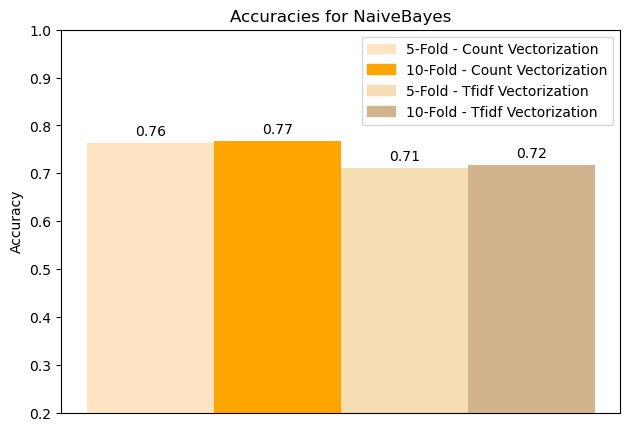

In [56]:
#Accuracies plot for NaiveBayes Model
colors = ['bisque', 'orange', 'wheat', 'tan']

a, b, c, d = avg_test_acc_nb_1, avg_test_acc_nb_2, avg_test_acc_nb_3, avg_test_acc_nb_4
index = np.arange(4)
legend_labels = ['5-Fold - Count Vectorization', '10-Fold - Count Vectorization', '5-Fold - Tfidf Vectorization', '10-Fold - Tfidf Vectorization']
bars = plt.bar(index, [a, b, c, d], 1, color=colors)

plt.tight_layout()
plt.ylabel('Accuracy')
plt.xticks([])
plt.ylim(0.2, 1)  # Change y-axis range here
plt.title('Accuracies for NaiveBayes')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for bar, value in zip(bars, [a, b, c, d]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(legend_patches, legend_labels)
plt.show()

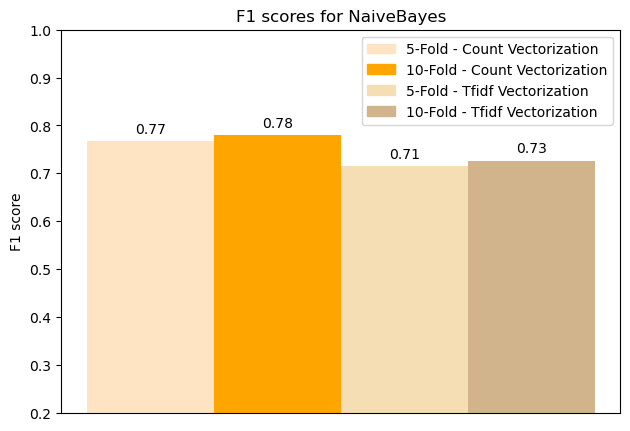

In [58]:
#F1 scores plot for NaiveBayes Model
colors = ['bisque', 'orange', 'wheat', 'tan']

a, b, c, d = f1_nb_1, f1_nb_2, f1_nb_3, f1_nb_4
index = np.arange(4)
legend_labels = ['5-Fold - Count Vectorization', '10-Fold - Count Vectorization', '5-Fold - Tfidf Vectorization', '10-Fold - Tfidf Vectorization']
bars = plt.bar(index, [a, b, c, d], 1, color=colors)

plt.tight_layout()
plt.ylabel('F1 score')
plt.xticks([])
plt.ylim(0.2, 1)  # Change y-axis range here
plt.title('F1 scores for NaiveBayes')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for bar, value in zip(bars, [a, b, c, d]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(legend_patches, legend_labels)
plt.show()

In [52]:
# SVM Classification Model using 5-fold Validation and CountVectorizer

kfold = KFold(n_splits=5, random_state=1, shuffle=True)
model = svm.SVC(kernel = 'linear')
train_accuracies_svc = []
test_accuracies_svc = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("countvectorizer", CountVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Most POS", "Greetings", "Most Common Word", "Most POS Subject", "Greetings in Subject", "Most Common Word in Subject"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    fit_model_svc = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_svc.append(train_acc)
    test_accuracies_svc.append(test_acc)
    
    i = i + 1
    

Y_pred_svc = fit_model_svc.predict(X_test_transform)
f1_svc_1 = f1_score(y_test, Y_pred_svc, average = "micro")
avg_train_acc_svc_1 = sum(train_accuracies_svc)/len(train_accuracies_svc)
avg_test_acc_svc_1 = sum(test_accuracies_svc)/len(test_accuracies_svc)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_svc_1)
print("Average Testing Accuracy:")
print(avg_test_acc_svc_1)
print("F1 Score:")
print(f1_svc_1)
print("===========================")

Round 1
Training Accuracy
0.9582789351194868
Testing Accuracy
0.8215461459870587
Round 2
Training Accuracy
0.9559232559459613
Testing Accuracy
0.8193892609830855
Round 3
Training Accuracy
0.9564625078049611
Testing Accuracy
0.824611193097968
Round 4
Training Accuracy
0.957996310486732
Testing Accuracy
0.8176657584014533
Round 5
Training Accuracy
0.9562366964665815
Testing Accuracy
0.8269754768392371
Average Training Accuracy:
0.9569795411647446
Average Testing Accuracy:
0.8220375670617607
F1 Score:
0.8269754768392371


In [53]:
# SVM Classification Model using 10-fold Validation and CountVectorizer

kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel = 'linear')
train_accuracies_svc = []
test_accuracies_svc = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("countvectorizer", CountVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Most POS", "Greetings", "Most Common Word", "Most POS Subject", "Greetings in Subject", "Most Common Word in Subject"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    fit_model_svc = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_svc.append(train_acc)
    test_accuracies_svc.append(test_acc)
    
    i = i + 1
    

Y_pred_svc = fit_model_svc.predict(X_test_transform)
f1_svc_2 = f1_score(y_test, Y_pred_svc, average = "micro")
avg_train_acc_svc_2 = sum(train_accuracies_svc)/len(train_accuracies_svc)
avg_test_acc_svc_2 = sum(test_accuracies_svc)/len(test_accuracies_svc)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_svc_2)
print("Average Testing Accuracy:")
print(avg_test_acc_svc_2)
print("F1 Score:")
print(f1_svc_2)
print("===========================")

Round 1
Training Accuracy
0.9562288712851305
Testing Accuracy
0.8331441543700341
Round 2
Training Accuracy
0.9563297845501791
Testing Accuracy
0.8417707150964813
Round 3
Training Accuracy
0.9550179121045461
Testing Accuracy
0.8283768444948921
Round 4
Training Accuracy
0.955649738893514
Testing Accuracy
0.8381017257039055
Round 5
Training Accuracy
0.9553722344156008
Testing Accuracy
0.8299273387829246
Round 6
Training Accuracy
0.9556245112137036
Testing Accuracy
0.8415077202543143
Round 7
Training Accuracy
0.9572390827215621
Testing Accuracy
0.8317438692098093
Round 8
Training Accuracy
0.9565579353666843
Testing Accuracy
0.8353769300635786
Round 9
Training Accuracy
0.9556245112137036
Testing Accuracy
0.8358310626702997
Round 10
Training Accuracy
0.9551704129771185
Testing Accuracy
0.842188919164396
Average Training Accuracy:
0.9558814994741743
Average Testing Accuracy:
0.8357969279810635
F1 Score:
0.842188919164396


In [54]:
# SVM Classification Model using 5-fold Validation and TfidfVectorizer

kfold = KFold(n_splits=5, random_state=1, shuffle=True)
model = svm.SVC(kernel = 'linear')
train_accuracies_svc = []
test_accuracies_svc = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Most POS", "Greetings", "Most Common Word", "Most POS Subject", "Greetings in Subject", "Most Common Word in Subject"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    fit_model_svc = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_svc.append(train_acc)
    test_accuracies_svc.append(test_acc)
    
    i = i + 1
    

Y_pred_svc = fit_model_svc.predict(X_test_transform)
f1_svc_3 = f1_score(y_test, Y_pred_svc, average = "micro")
avg_train_acc_svc_3 = sum(train_accuracies_svc)/len(train_accuracies_svc)
avg_test_acc_svc_3 = sum(test_accuracies_svc)/len(test_accuracies_svc)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_svc_3)
print("Average Testing Accuracy:")
print(avg_test_acc_svc_3)
print("F1 Score:")
print(f1_svc_3)
print("===========================")

Round 1
Training Accuracy
0.9103990463756598
Testing Accuracy
0.8108752412305597
Round 2
Training Accuracy
0.9073338252823977
Testing Accuracy
0.8160971733454422
Round 3
Training Accuracy
0.9091502525969234
Testing Accuracy
0.8121239641275968
Round 4
Training Accuracy
0.9099474953881084
Testing Accuracy
0.8151680290644868
Round 5
Training Accuracy
0.9070242656449553
Testing Accuracy
0.8189146230699365
Average Training Accuracy:
0.908770977057609
Average Testing Accuracy:
0.8146358061676043
F1 Score:
0.8189146230699366


In [59]:
# SVM Classification Model using 10-fold Validation and TfidfVectorizer

kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel = 'linear')
train_accuracies_svc = []
test_accuracies_svc = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Most POS", "Greetings", "Most Common Word", "Most POS Subject", "Greetings in Subject", "Most Common Word in Subject"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    fit_model_svc = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_svc.append(train_acc)
    test_accuracies_svc.append(test_acc)
    
    i = i + 1
    

Y_pred_svc = fit_model_svc.predict(X_test_transform)
f1_svc_4 = f1_score(y_test, Y_pred_svc, average = "micro")
avg_train_acc_svc_4 = sum(train_accuracies_svc)/len(train_accuracies_svc)
avg_test_acc_svc_4 = sum(test_accuracies_svc)/len(test_accuracies_svc)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_svc_4)
print("Average Testing Accuracy:")
print(avg_test_acc_svc_4)
print("F1 Score:")
print(f1_svc_4)
print("===========================")

Round 1
Training Accuracy
0.9109440435945305
Testing Accuracy
0.8204313280363223
Round 2
Training Accuracy
0.9092032897724406
Testing Accuracy
0.8183881952326901
Round 3
Training Accuracy
0.9083202987032646
Testing Accuracy
0.8206583427922814
Round 4
Training Accuracy
0.9078432856530185
Testing Accuracy
0.8301544050862852
Round 5
Training Accuracy
0.9091046696435329
Testing Accuracy
0.8142597638510445
Round 6
Training Accuracy
0.9086505714069477
Testing Accuracy
0.8235694822888283
Round 7
Training Accuracy
0.9091298973233432
Testing Accuracy
0.8233424159854678
Round 8
Training Accuracy
0.9097605893186004
Testing Accuracy
0.818346957311535
Round 9
Training Accuracy
0.9086505714069477
Testing Accuracy
0.8208446866485014
Round 10
Training Accuracy
0.9084992053280859
Testing Accuracy
0.8331062670299727
Average Training Accuracy:
0.9090106422150711
Average Testing Accuracy:
0.822310184426293
F1 Score:
0.8331062670299727


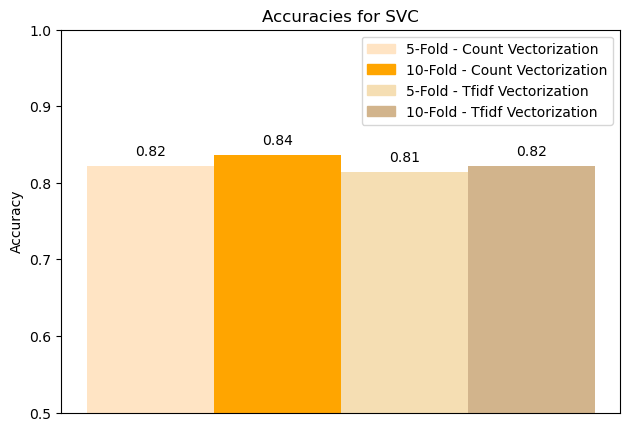

In [66]:
#Accuracies plot for SVC Model
colors = ['bisque', 'orange', 'wheat', 'tan']

a, b, c, d = avg_test_acc_svc_1, avg_test_acc_svc_2, avg_test_acc_svc_3, avg_test_acc_svc_4
index = np.arange(4)
legend_labels = ['5-Fold - Count Vectorization', '10-Fold - Count Vectorization', '5-Fold - Tfidf Vectorization', '10-Fold - Tfidf Vectorization']
bars = plt.bar(index, [a, b, c, d], 1, color=colors)

plt.tight_layout()
plt.ylabel('Accuracy')
plt.xticks([])
plt.ylim(0.5, 1)  # Change y-axis range here
plt.title('Accuracies for SVC')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for bar, value in zip(bars, [a, b, c, d]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(legend_patches, legend_labels)
plt.show()

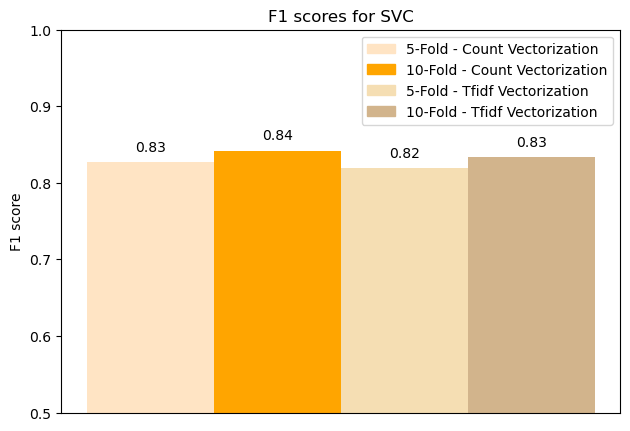

In [68]:
#F1 scores plot for SVC Model
colors = ['bisque', 'orange', 'wheat', 'tan']

a, b, c, d = f1_svc_1, f1_svc_2, f1_svc_3, f1_svc_4
index = np.arange(4)
legend_labels = ['5-Fold - Count Vectorization', '10-Fold - Count Vectorization', '5-Fold - Tfidf Vectorization', '10-Fold - Tfidf Vectorization']
bars = plt.bar(index, [a, b, c, d], 1, color=colors)

plt.tight_layout()
plt.ylabel('F1 score')
plt.xticks([])
plt.ylim(0.5, 1)  # Change y-axis range here
plt.title('F1 scores for SVC')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for bar, value in zip(bars, [a, b, c, d]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(legend_patches, legend_labels)
plt.show()

In [69]:
# Random Forest Classifier Model using 5-fold Validation and CountVectorizer
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
model = RandomForestClassifier(n_estimators=100)  
train_accuracies_rf = []
test_accuracies_rf = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # ColumnTransformers
    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("countvectorizer", CountVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown="ignore"), ["Most POS", "Greetings", "Most Common Word"])])

    # Transformation for ct_three
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    # Transformation for ct_two
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)

    # Transformation for ct_one
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    # Merge transformed features
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))

    # Train the Random Forest Classifier
    fit_model_rf = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)

    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)

    train_accuracies_rf.append(train_acc)
    test_accuracies_rf.append(test_acc)

    i += 1

# Evaluation
Y_pred_rf = fit_model_rf.predict(X_test_transform)
f1_rf_1 = f1_score(y_test, Y_pred_rf, average="micro")
avg_train_acc_rf_1 = sum(train_accuracies_rf) / len(train_accuracies_rf)
avg_test_acc_rf_1 = sum(test_accuracies_rf) / len(test_accuracies_rf)

print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_rf_1)
print("Average Testing Accuracy:")
print(avg_test_acc_rf_1)
print("F1 Score:")
print(f1_rf_1)
print("===========================")

Round 1
Training Accuracy
0.9982970993926321
Testing Accuracy
0.8166647746622773
Round 2
Training Accuracy
0.9981551910086848
Testing Accuracy
0.8159836530820751
Round 3
Training Accuracy
0.9983538627462111
Testing Accuracy
0.8130321262345329
Round 4
Training Accuracy
0.9984106712076061
Testing Accuracy
0.8151680290644868
Round 5
Training Accuracy
0.9984958138214843
Testing Accuracy
0.8205040871934605
Average Training Accuracy:
0.9983425276353237
Average Testing Accuracy:
0.8162705340473664
F1 Score:
0.8205040871934605


In [70]:
# Random Forest Classifier Model using 10-fold Validation and CountVectorizer
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier(n_estimators=100)  
train_accuracies_rf = []
test_accuracies_rf = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # ColumnTransformers
    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("countvectorizer", CountVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown="ignore"), ["Most POS", "Greetings", "Most Common Word"])])

    # Transformation for ct_three
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    # Transformation for ct_two
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)

    # Transformation for ct_one
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    # Merge transformed features
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))

    # Train the Random Forest Classifier
    fit_model_rf = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)

    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)

    train_accuracies_rf.append(train_acc)
    test_accuracies_rf.append(test_acc)

    i += 1

# Evaluation
Y_pred_rf = fit_model_rf.predict(X_test_transform)
f1_rf_2 = f1_score(y_test, Y_pred_rf, average="micro")
avg_train_acc_rf_2 = sum(train_accuracies_rf) / len(train_accuracies_rf)
avg_test_acc_rf_2 = sum(test_accuracies_rf) / len(test_accuracies_rf)

print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_rf_2)
print("Average Testing Accuracy:")
print(avg_test_acc_rf_2)
print("F1 Score:")
print(f1_rf_2)
print("===========================")

Round 1
Training Accuracy
0.9981835612291236
Testing Accuracy
0.8338251986379115
Round 2
Training Accuracy
0.9982340178616479
Testing Accuracy
0.8390465380249716
Round 3
Training Accuracy
0.9980826479640749
Testing Accuracy
0.8331441543700341
Round 4
Training Accuracy
0.9982340624132798
Testing Accuracy
0.8360581289736603
Round 5
Training Accuracy
0.9982845177729004
Testing Accuracy
0.829700272479564
Round 6
Training Accuracy
0.998158379373849
Testing Accuracy
0.8346957311534968
Round 7
Training Accuracy
0.9981331516940387
Testing Accuracy
0.82811080835604
Round 8
Training Accuracy
0.9983602008123313
Testing Accuracy
0.8306085376930064
Round 9
Training Accuracy
0.9981836070536593
Testing Accuracy
0.8337874659400545
Round 10
Training Accuracy
0.9984358838517622
Testing Accuracy
0.8442325158946412
Average Training Accuracy:
0.9982290030026666
Average Testing Accuracy:
0.8343209351523381
F1 Score:
0.8442325158946412


In [71]:
# Random Forest Classifier Model using 5-fold Validation and TfidfVectorizer
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
model = RandomForestClassifier(n_estimators=100)  
train_accuracies_rf = []
test_accuracies_rf = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # ColumnTransformers
    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown="ignore"), ["Most POS", "Greetings", "Most Common Word"])])

    # Transformation for ct_three
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    # Transformation for ct_two
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)

    # Transformation for ct_one
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    # Merge transformed features
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))

    # Train the Random Forest Classifier
    fit_model_rf = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)

    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)

    train_accuracies_rf.append(train_acc)
    test_accuracies_rf.append(test_acc)

    i += 1

# Evaluation
Y_pred_rf = fit_model_rf.predict(X_test_transform)
f1_rf_3 = f1_score(y_test, Y_pred_rf, average="micro")
avg_train_acc_rf_3 = sum(train_accuracies_rf) / len(train_accuracies_rf)
avg_test_acc_rf_3 = sum(test_accuracies_rf) / len(test_accuracies_rf)

print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_rf_3)
print("Average Testing Accuracy:")
print(avg_test_acc_rf_3)
print("F1 Score:")
print(f1_rf_3)
print("===========================")

Round 1
Training Accuracy
0.9982970993926321
Testing Accuracy
0.8201839028266545
Round 2
Training Accuracy
0.9981551910086848
Testing Accuracy
0.8160971733454422
Round 3
Training Accuracy
0.9983538627462111
Testing Accuracy
0.8154160517652401
Round 4
Training Accuracy
0.9984106712076061
Testing Accuracy
0.81641689373297
Round 5
Training Accuracy
0.9984958138214843
Testing Accuracy
0.8214123524069028
Average Training Accuracy:
0.9983425276353237
Average Testing Accuracy:
0.8179052748154418
F1 Score:
0.8214123524069028


In [73]:
# Random Forest Classifier Model using 10-fold Validation and TfidfVectorizer
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier(n_estimators=100)  
train_accuracies_rf = []
test_accuracies_rf = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # ColumnTransformers
    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["WordCount", "ParagraphCount", "SentenceCount", "AverageWordLength", "PolarityScore", "SubjectWordCount", "SubjectAverageWordLength", "SubjectPolarityScore"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "finalBody"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown="ignore"), ["Most POS", "Greetings", "Most Common Word"])])

    # Transformation for ct_three
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    # Transformation for ct_two
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)

    # Transformation for ct_one
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    # Merge transformed features
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))

    # Train the Random Forest Classifier
    fit_model_rf = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)

    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)

    train_accuracies_rf.append(train_acc)
    test_accuracies_rf.append(test_acc)

    i += 1

# Evaluation
Y_pred_rf = fit_model_rf.predict(X_test_transform)
f1_rf_4 = f1_score(y_test, Y_pred_rf, average="micro")
avg_train_acc_rf_4 = sum(train_accuracies_rf) / len(train_accuracies_rf)
avg_test_acc_rf_4 = sum(test_accuracies_rf) / len(test_accuracies_rf)

print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_rf_4)
print("Average Testing Accuracy:")
print(avg_test_acc_rf_4)
print("F1 Score:")
print(f1_rf_4)
print("===========================")

Round 1
Training Accuracy
0.9981835612291236
Testing Accuracy
0.8338251986379115
Round 2
Training Accuracy
0.9982340178616479
Testing Accuracy
0.836322360953462
Round 3
Training Accuracy
0.9980826479640749
Testing Accuracy
0.8326901248581158
Round 4
Training Accuracy
0.9982340624132798
Testing Accuracy
0.8383287920072662
Round 5
Training Accuracy
0.9982845177729004
Testing Accuracy
0.8247048138056312
Round 6
Training Accuracy
0.998158379373849
Testing Accuracy
0.8328792007266121
Round 7
Training Accuracy
0.9981331516940387
Testing Accuracy
0.8283378746594006
Round 8
Training Accuracy
0.9983854284921416
Testing Accuracy
0.8299273387829246
Round 9
Training Accuracy
0.9981836070536593
Testing Accuracy
0.8351498637602179
Round 10
Training Accuracy
0.9984358838517622
Testing Accuracy
0.8474114441416893
Average Training Accuracy:
0.9982315257706478
Average Testing Accuracy:
0.8339577012333231
F1 Score:
0.8474114441416893


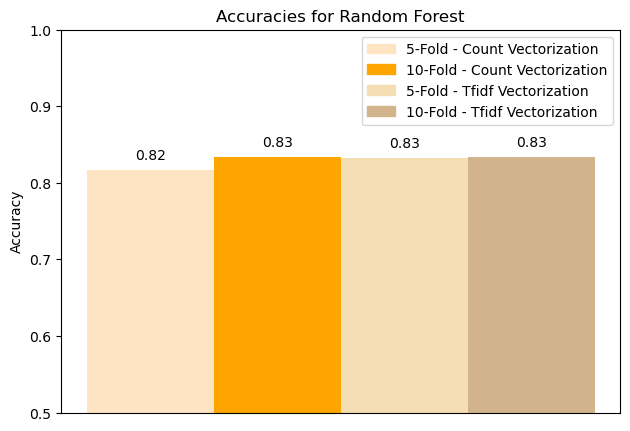

In [76]:
#Accuracies plot for Random Forest Model
colors = ['bisque', 'orange', 'wheat', 'tan']

a, b, c, d = avg_test_acc_rf_1, avg_test_acc_rf_2, avg_test_acc_rf_3, avg_test_acc_rf_4
index = np.arange(4)
legend_labels = ['5-Fold - Count Vectorization', '10-Fold - Count Vectorization', '5-Fold - Tfidf Vectorization', '10-Fold - Tfidf Vectorization']
bars = plt.bar(index, [a, b, c, d], 1, color=colors)

plt.tight_layout()
plt.ylabel('Accuracy')
plt.xticks([])
plt.ylim(0.5, 1)  # Change y-axis range here
plt.title('Accuracies for Random Forest')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for bar, value in zip(bars, [a, b, c, d]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(legend_patches, legend_labels)
plt.show()

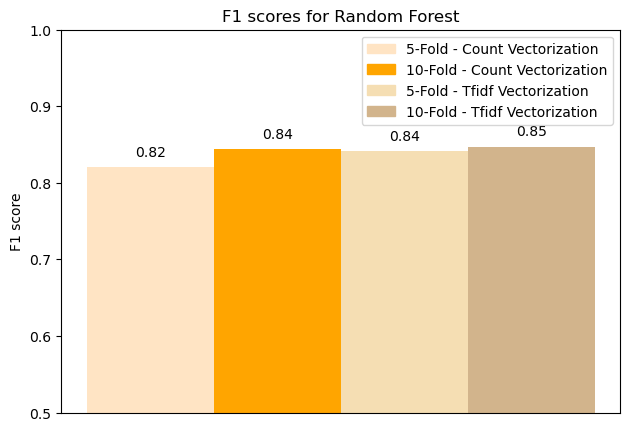

In [75]:
#F1 scores plot for Random Forest Model
colors = ['bisque', 'orange', 'wheat', 'tan']

a, b, c, d = f1_rf_1, f1_rf_2, f1_rf_3, f1_rf_4
index = np.arange(4)
legend_labels = ['5-Fold - Count Vectorization', '10-Fold - Count Vectorization', '5-Fold - Tfidf Vectorization', '10-Fold - Tfidf Vectorization']
bars = plt.bar(index, [a, b, c, d], 1, color=colors)

plt.tight_layout()
plt.ylabel('F1 score')
plt.xticks([])
plt.ylim(0.5, 1)  # Change y-axis range here
plt.title('F1 scores for Random Forest')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for bar, value in zip(bars, [a, b, c, d]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(legend_patches, legend_labels)
plt.show()